In [120]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy.stats import probplot


In [121]:
Auto = pd.read_csv('Auto.data',na_values=['?'],delim_whitespace=True).dropna()
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


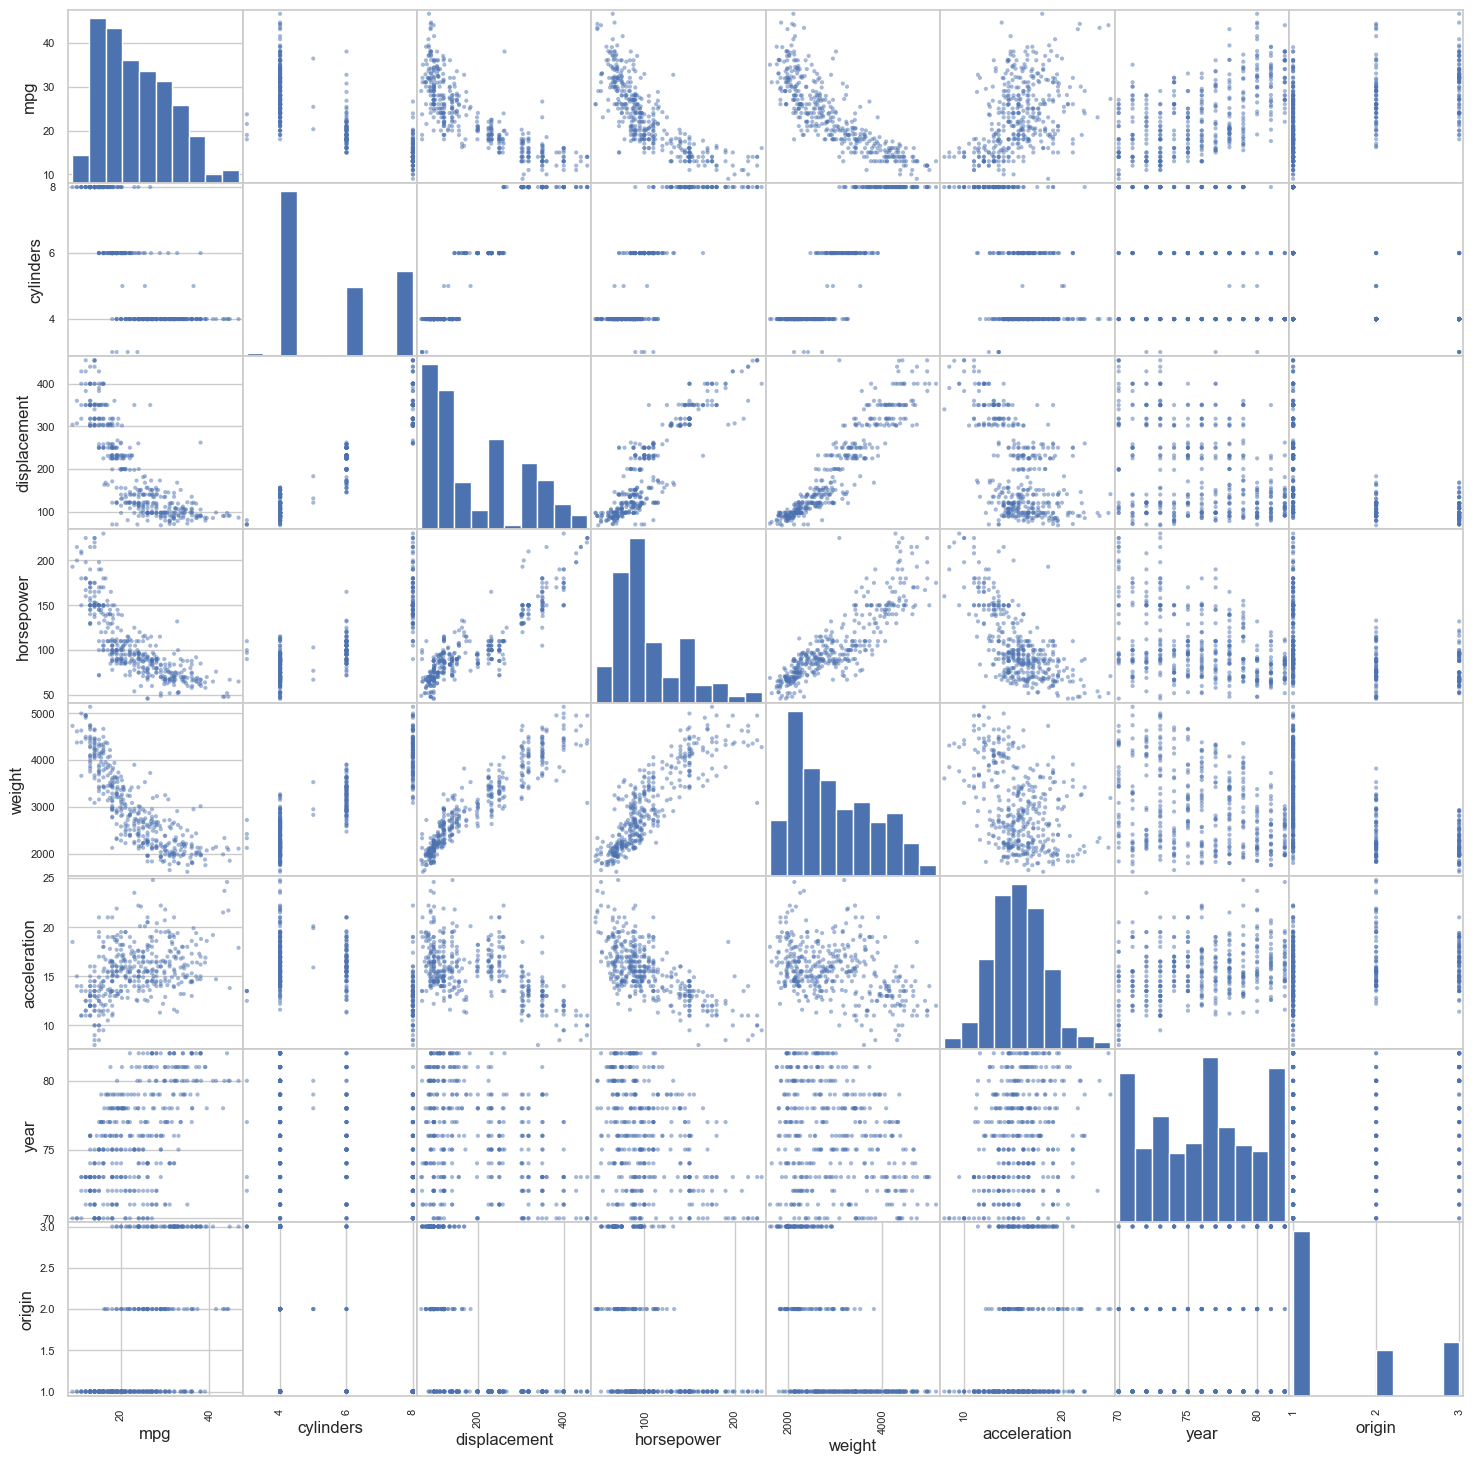

In [122]:
#9.(a)
pd.plotting.scatter_matrix(Auto,figsize=(18,18));

In [123]:
#9.(b)
Auto.corr()

/var/folders/b1/_lbgm2qn7lj0s6f8mq3gk_0h0000gn/T/ipykernel_98396/3714369803.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Auto.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [124]:
pip install ISLP

Note: you may need to restart the kernel to use updated packages.


In [125]:
from ISLP import load_data
from ISLP.models import(ModelSpec as MS,summarize,poly)

In [126]:
y = Auto['mpg']
terms = Auto.columns.drop(['mpg','name'])
terms

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [127]:
#9.(c)
X = sm.add_constant(Auto[terms])  # Adding a constant for the intercept
model = sm.OLS(y, X)
result = model.fit()
summarize(result)

,coef,std err,t,P>|t|
const,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [128]:
#Weight,year,origin and displacement appear to have a statistically significant relationship 
#to the response because their p-values are less than 0.05 thus we can reject the null hypothesis that 
#they have no relationship with the response
#coefficient for the year variable is 0.7508 which suggests that there is a positive relationship between year and mpg and 
#and that given other factors equal,mpg increase by 0.7508 unit if year increases 1 unit

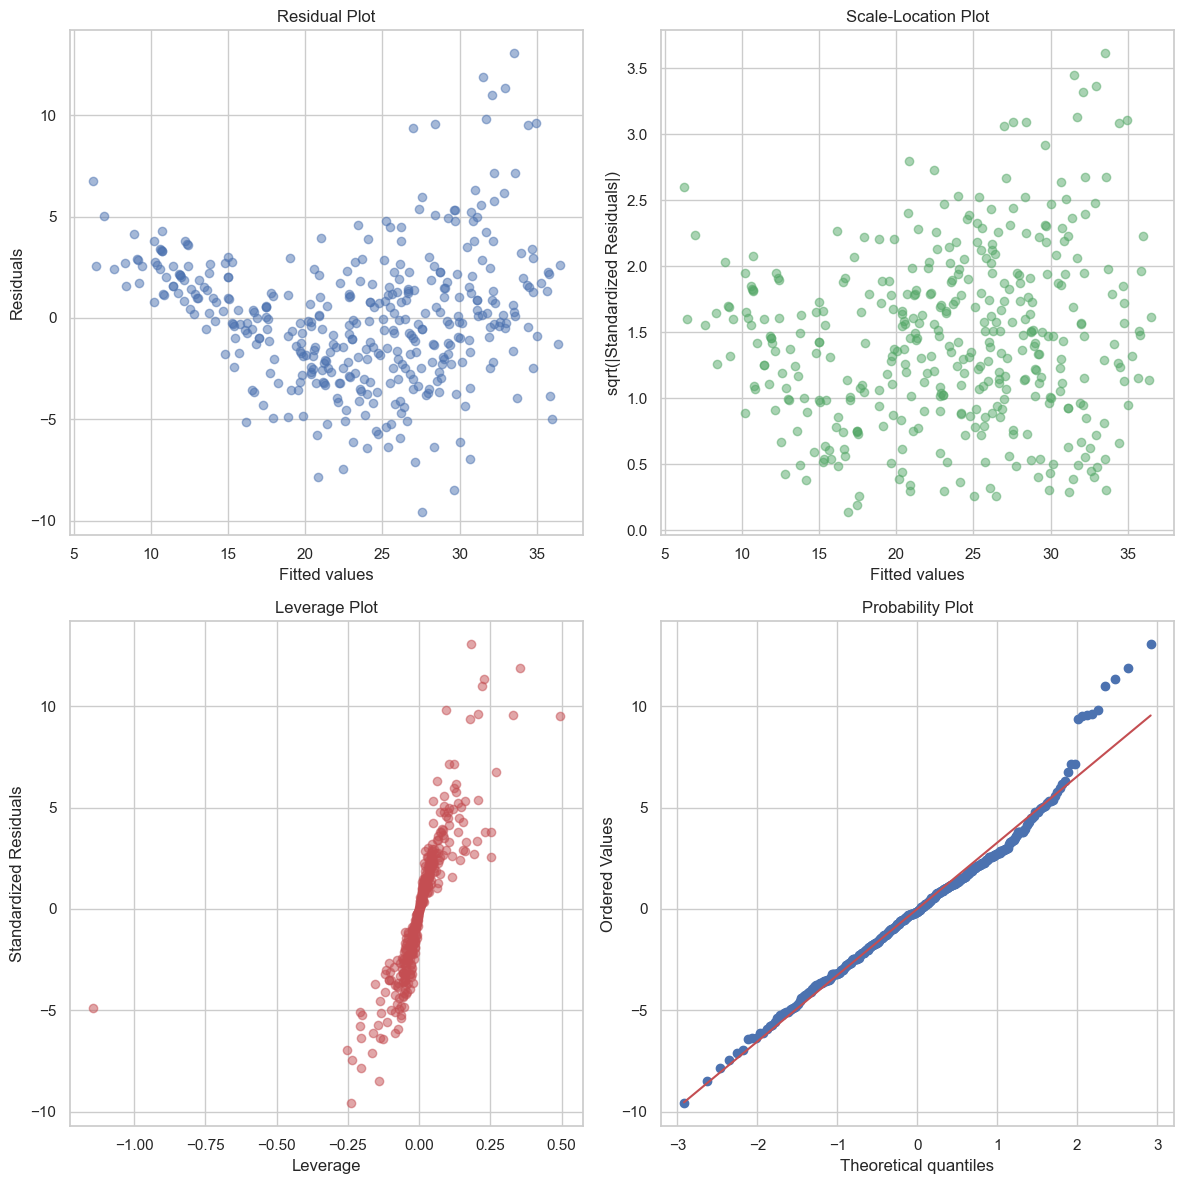

In [129]:
# Residual plot
residuals = result.resid
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.scatter(result.fittedvalues, residuals, color='b', alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# Scale-Location plot
plt.subplot(2, 2, 2)
plt.scatter(result.fittedvalues, np.sqrt(np.abs(residuals)), color='g', alpha=0.5)
plt.title('Scale-Location Plot')
plt.xlabel('Fitted values')
plt.ylabel('sqrt(|Standardized Residuals|)')

# Leverage plot
leverage = OLSInfluence(result).influence
sns.set(style="whitegrid")
plt.subplot(2, 2, 3)
plt.scatter(leverage, residuals, alpha=0.5, color='r')
plt.title('Leverage Plot')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')

# Q-Q plot
plt.subplot(2, 2, 4)
probplot(residuals, plot=plt)
plt.tight_layout()
plt.show()

# 1.Linearity: 
#   The top-left residual plot suggests that the residuals are not randomly distributed around the horizontal axis 
#   and that there is a discernible conical pattern,which means relationship between the dependent and independent 
#   variables is not linear;The btop-right Scale-Location plot suggests that a square-root transform reduces the 
#   non-linearity of this relationship allowing our model to achieve an improved fit.
# 2.Heteroscedasticity:  the top-left residual plot suggests that variance of residuals increases with response. 
#   The scale-location plot suggests that a square-root transform helps to mitigate this effect cause its points are 
#   randomly dispersed and do not form a pattern and that meanss that the residuals have constant variance
# 3.Outliers: The residual plot shows that there are four outliers outside the boundary of 10. The leverage plot 
#   suggests that leverage of these outliers is relatively low and influence of them is relatively not that obvious.
# 4.Leverage: The leverage plot reveals one point with particularly high leverage,around -1.2 .
# 5.Normality: as showed in probability plot,points lie approximately on the 45-degree reference line,indicating that 
#   the residuals are normally distributed.

In [130]:
#（e）
#1.('cylinders','displacement')
X = MS(['cylinders','displacement','horsepower','weight',
        'acceleration','year','origin',
        ('cylinders','displacement')]).fit_transform(Auto)
y = Auto['mpg']
model = sm.OLS(y,X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,-2.7097,4.686,-0.578,0.563
cylinders,-2.6962,0.409,-6.584,0.000
displacement,-0.0775,0.014,-5.474,0.000
horsepower,-0.0476,0.013,-3.559,0.000
weight,-0.0052,0.001,-8.370,0.000
acceleration,0.0598,0.092,0.651,0.515
year,0.7595,0.047,16.044,0.000
origin,0.7087,0.274,2.590,0.010
cylinders:displacement,0.0136,0.002,7.907,0.000


In [131]:
#2.('cylinders','horsepower')
X = MS(['cylinders','displacement','horsepower','weight',
        'acceleration','year','origin',
        ('cylinders','horsepower')]).fit_transform(Auto)
y = Auto['mpg']
model = sm.OLS(y,X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,11.7025,4.912,2.383,0.018
cylinders,-4.3061,0.458,-9.400,0.000
displacement,-0.0014,0.007,-0.201,0.840
horsepower,-0.3157,0.031,-10.304,0.000
weight,-0.0039,0.001,-6.250,0.000
acceleration,-0.1703,0.090,-1.889,0.060
year,0.7393,0.045,16.476,0.000
origin,0.9032,0.250,3.617,0.000
cylinders:horsepower,0.0402,0.004,10.619,0.000


In [132]:
#3.('cylinders','weight')
X = MS(['cylinders','displacement','horsepower','weight',
        'acceleration','year','origin',
        ('cylinders','weight')]).fit_transform(Auto)
y = Auto['mpg']
model = sm.OLS(y,X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,7.3143,5.008,1.461,0.145
cylinders,-5.0347,0.580,-8.687,0.000
displacement,0.0156,0.007,2.287,0.023
horsepower,-0.0314,0.013,-2.489,0.013
weight,-0.0150,0.001,-13.513,0.000
acceleration,0.1006,0.090,1.121,0.263
year,0.7813,0.046,16.834,0.000
origin,0.8030,0.262,3.068,0.002
cylinders:weight,0.0015,0.000,9.088,0.000


In [133]:
#4.('displacement','horsepower')
X = MS(['cylinders','displacement','horsepower','weight',
        'acceleration','year','origin',
        ('displacement','horsepower')]).fit_transform(Auto)
y = Auto['mpg']
model = sm.OLS(y,X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,-1.8935,4.302000,-0.440,0.660
cylinders,0.6466,0.302000,2.143,0.033
displacement,-0.0749,0.011000,-6.859,0.000
horsepower,-0.1975,0.021000,-9.624,0.000
weight,-0.0031,0.001000,-4.861,0.000
acceleration,-0.2131,0.091000,-2.351,0.019
year,0.7379,0.045000,16.534,0.000
origin,0.6891,0.253000,2.727,0.007
displacement:horsepower,0.0005,0.000048,10.878,0.000


In [134]:
#We have add interaction terms:('cylinders','displacement'),('cylinders','horsepower'),('cylinders','weight'),
#('displacement','horsepower') and their p-value is close to 0 which means they are statistically significant